In [349]:
import matplotlib.pyplot as plt
import matplotlib.colors as plt2
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
import numpy as np

In [350]:
data = pd.read_csv("toy.txt",delimiter=r"\s+",header=None)

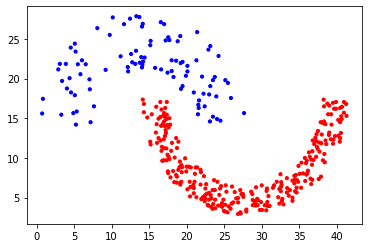

In [351]:
colors = ["red", "blue"]
element0 = list(data[0])
element1 = list(data[1])
color_indices = list(data[2])
#y_true=color_indices
colormap = plt2.ListedColormap(colors)
temp = plt.figure()
plt.scatter(element0, element1, s=10 ,c=color_indices, cmap=colormap)
temp.savefig(r'toy_real.png', dpi=300)

In [352]:
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

In [353]:
x = train_set.values [:,0:2]
y = train_set.values[:,2]
x_test = test_set.values [:,0:2]
y_test = test_set.values[:,2]

In [354]:
binary_y = y == 1
binary_y_test = y_test == 1

In [359]:
clf_svm = LinearSVC(C=1, max_iter=100000, random_state=0)
svc = SVC (C=1.0, kernel='rbf', gamma=0.05, max_iter=100000)

In [360]:
clf_svm.fit(x.reshape(-1,2), binary_y.ravel())
svc.fit(x.reshape(-1,2), binary_y.ravel())

SVC(gamma=0.05, max_iter=100000)

In [361]:
predicted_y_svm = clf_svm.predict(x_test).ravel()
predicted_y_svm_full = clf_svm.predict(data.values[:,0:2]).ravel()
predicted_y_svc = svc.predict(x_test).ravel()
predicted_y_svc_full = svc.predict(data.values[:,0:2]).ravel()

In [362]:
print('accuracy of svm: ', accuracy_score(binary_y_test, predicted_y_svm))
print('precision of svm:' ,precision_score(binary_y_test, predicted_y_svm))
print('recall of svm:' ,recall_score(binary_y_test, predicted_y_svm))
print('f1_score of svm:' ,f1_score(binary_y_test, predicted_y_svm))

accuracy of svm:  0.9466666666666667
precision of svm: 0.9245283018867925
recall of svm: 1.0
f1_score of svm: 0.9607843137254902


In [363]:
print('accuracy of svc: ', accuracy_score(binary_y_test, predicted_y_svc))
print('precision of svc:' ,precision_score(binary_y_test, predicted_y_svc))
print('recall of svc:' ,recall_score(binary_y_test, predicted_y_svc))
print('f1_score of svc:' ,f1_score(binary_y_test, predicted_y_svc))

accuracy of svc:  1.0
precision of svc: 1.0
recall of svc: 1.0
f1_score of svc: 1.0


In [254]:
#predicted_y_svm.astype(int)

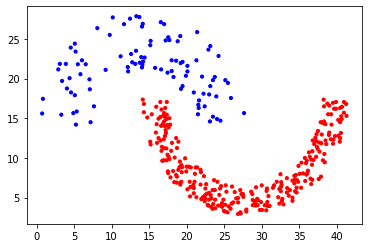

In [364]:
colors = [ "blue", "red"]
element0 = list(data.values[:,0])
element1 = list(data.values[:,1])
color_indices = predicted_y_svc_full.astype(int) 
temp = plt.figure()
#y_true=color_indices
colormap = plt2.ListedColormap(colors)
plt.scatter(element0, element1, s=10 ,c=color_indices, cmap=colormap)
temp.savefig(r'toy_output_svc0.5.png', dpi=300)